<a href="https://colab.research.google.com/github/sujin-create/finedu/blob/main/%EA%B8%88%EC%9C%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EC%9D%84%20%EC%9C%84%ED%95%9C%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%ED%99%9C%EC%9A%A9%EB%B2%95/%EA%B8%88%EC%9C%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B0%95%EC%9D%98_7%EA%B0%95_%EC%82%BC%EC%A4%91%EC%B0%BD_%EB%A7%A4%EB%A7%A4_%EC%8B%9C%EC%8A%A4%ED%85%9Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 심리 투자 법칙

알렉산더 엘더의 '주식시장에서 살아남는 심리투자 법칙'은 전업투자자들에게는 생존 교본같은 서적입니다.  

앞서 살핀 '볼린저 밴드 투자 기법'이 각종 시장 지표를 활용한 매매기법을 위주로 다룬 반면, 이 책은 정신분석학자가 쓴 책인만큼 성공적인 매매를 위한 세 가지 요소인 3M을 다음과 같이 강조를 합니다.  

* 정신(Mind) : 시장 노이즈에 휩쓸리지 말자.  
* 기법(Method) : 시장 지표를 활용해 주가를 분석하고 매매에 활용하자.  
* 자금(Money) : 리스크 거래의 일부로 포함시키는 자금을 관리하자.

---

##1-1. 시장 지표

**시장 지표(market indicator)를 크게 '추세', '오실레이터', '기타 지표'로 나눌 수가 있습니다. 이동평균이나 MACD 같이 시장의 흐름을 나타내는 지표의 경우에는 '추세 지표'라고 하는데, 시장이 움직일 때는 잘 맞는데, 시장이 횡보할 때는 잘못된 신호를 보내기도 합니다.**  

+ 아래 내용은 강의에서 자세히 다루지는 않으나 참고만하세요.  


오실레이터는 스토캐스틱이나 RSI처럼 과거 일정 기간의 가격 범위 안에서 현재 가격의 상대적인 위치를 나타내는 지표로, 현재 가격 위치가 주기적으로 변화하는 모습이 오실레이터 발진기에서 생성하는 교류 주파수 모습과 유사합니다. 오실레이터는 횡보장에서 전환점을 포착하는 데 적합하지만 가격보다 앞서 변하는 경향이 있습니다.  

기타 지표들은 강세장과 약세장에 따른 강도를 예측합니다.

---

##1-2. 단순 이동 평균(SMA)



흔히 이동 평균이라고 부르는 단순 이동 평균(simple moving average, SMA)는 가장 기본적이면서 널리 쓰이는 시장 지표입니다. 처음 배우는 개념이 아니라 앞선 강의에서 데이터프레임으로 rolling이라는 함수를 통해서 우리가 이미 사용했던 지표를 설명하고 있는 것입니다.

```
df['sma20'] = df['Close'].rolling(20).mean()
```

단순 이동평균은 일정 기간 동안의 가격을 모두 더한 뒤 이를 가격 개수로 나누어 평균값을 구한 것입니다. 이렇게 구해진 이동 평균 값들을 선으로 이으면 이동 평균선이 되는데, 이동 평균선의 진행 방향을 보면 전반적인 가격 흐름을 예측할 수 있습니다.

이동 평균은 가장 오래된 가격이 제외되고 새로운 가격이 추가되면서 값이 달라지게 됩니다. 예를 들어 20일치의 이동 평균을 구한다고 하면, 3월 1일부터 3월 20일까지의 이동 평균을 구하고나서 그 다음은 3월 2일부터 3월 21일까지의 이동 평균을 구하게 되니까 가장 오래된 값인 3월 1일 값이 제외되고, 3월 21일이라는 새로운 값이 들어가니까 평균값이 달라진다는 의미입니다.  

만일 오래돼서 제외되는 가격이 매우 높은 가격이었다면 이동 평균도 많이 하락하게 되는데, 이는 단지 오래된 과거의 가격 변동으로 인한 것일 뿐 최근 가격이 하락했다는 의미가 아닙니다.  
단순 이동 평균은 오래된 가격의 변동과 최근 가격의 변동을 동일하게 반영하기 때문에 최근 가격의 변동이 왜곡될 가능성이 있습니다.

---

##1-3. 지수 이동 평균(EMA)


참고 : https://wendys.tistory.com/178

지수 이동 평균(exponential moving average, EMA)은 단순 이동 평균보다 한 단계 더 세련된 도구입니다. 최근의 데이터에 가중치를 부여해 **단순 이동 평균에 비해서 최근의 데이터 변동을 잘 반영하도록** 설계되었습니다.

**수식은 다음과 같습니다.**

$$오늘의\ 지수\ 이동\ 평균 = (오늘의\ 종가 * K) + (어제의\ 지수\ 이동평균 * (1 - K))$$

$$단,\ K = 2 / (기간 + 1)$$

지수 이동 평균은 저희가 지금까지 사용했던 단순 이동 평균에 비해서 두 가지 장점이 있습니다.  

첫번째, 최근 거래일에 더 많은 가중치를 주므로 최근 간격의 변동을 더 잘 나타냅니다.  

두번째, 오래된 지수의 이동 평균 데이터가 천천히 사라지므로 오래된 데이터가 빠져나갈 때 지수 이동 평균이 급등락하지 않습니다.  

지수 이동 평균선이 오르면 추세가 상승하고 있음을 나타내므로 매수 측에서 매매해야 합니다.  
반대로 지수 이동 평균선이 내리고 있다면 매도 측에서 매매하는 것이 좋습니다.  

알렉산더 엘더에 따르면 이동 평균의 기간은 시장(the dominant market) 사이클의 절반 정도가 적당합니다.  

즉, 시장을 관찰하였을 때, 20일 주기를 발견했다면 10일 이동 평균선을 사용하면 됩니다.  
참고로 알렉산더 엘더는 매매할 때 주로 13일 지수 이동 평균을 사용합니다.

---

##1-4. 이동평균 수렴확산(MACD)

참고 : https://academy.binance.com/ko/articles/macd-indicator-explained

뉴욕의 애널리스트이자 펀드매니저였던 제럴드 아펠은 세 가지 지수 이동 평균선을 이용하여 이동평균 수렴 확산(Moving Average Convergence Divergence, MACD)를 개발했습니다.  

실제 MACD 차트에서는 두 선으로 표시되는데,  
* MACD 선 : 실선  
* MACD 신호선 : 점선  

**이 두 선의 교차점에서 매매 신호가 발생합니다.**  

* MACD 선 : 종가의 12일 지수 이동평균선에서 26일 지수 이동평균선을 뺀 것. 가격 변화에 상대적으로 빨리 반응.  
* MACD 신호선 :  MACD선의 9일 지수 이동 평균. 가격 변화에 상대적으로 늦게 반응.  

빠른 MACD 선이 느린 MACD 신호선을 상향 돌파하는 것은 매수세가 시장을 주도한다는 뜻이므로 매수적 관점에서 대응하는 것이 좋습니다. 반대로 빠른 MACD 선이 늦은 MACD 신호선을 하향 돌파할 때는 매도 관점에서 대응해야 합니다.

---

##1-5. MACD 히스토그램

MACD 히스토그램(MACD Histogram)은 원래의 MACD보다 매수와 매도 상태를 더 잘 표현합니다. 단순히 매수와 매도의 비중을 표시할 뿐만 아니라 강해지고 있는지 약해지고 있는지를 보여주므로 기술적 분석가에게는 최고의 도구입니다.

수식은 다음과 같습니다.

$$MACD\ 히스토그램\ =\ MACD선\ -\ 신호선$$

MACD 히스토그램의 기울기를 확인하는 것은 히스토그램이 중심선(0) 위에 있는지 아니면 아래에 있는지 확인하는 것보다 중요합니다.  

현재 봉이 이전 봉보다 높다면 기울기는 올라가고 있으므로 매수를 해야 합니다. 최고의 매수 신호 MACD 히스토그램이 중심선 아래에 있고, 기울기가 상향 반전하고 있을 때 발생합니다.  

MACD 히스토그램과 가격과의 다이버전스는 기술적 분석에서 가장 강력한 신호입니다. 가격이 신저점까지 낮아졌으나 MACD 히스토그램이 저점에서 상승하기 시작했다면, 강세 다이버전스(bullish divergence)가 형성됨을 뜻합니다. 반면에 가격이 신저점을 갱신하면 MACD 히스토그램도 낮아지고 있다면 단순히 하향 추세 신호입니다.

---

#2. 삼중창 매매 시스템

알렉산더 엘더가 개발한 삼중창 매매 시스템은 1986년 4월 [퓨처스 매거진]에 실리면서 대중에게 공개되었습니다. 삼중창 시스템은 추세 추종과 역추세 매매법을 함께 사용하며, 세 단계의 창(Screen)을 거쳐 더 정확한 매매 시점을 찾도록 구성되어져 있습니다.

같은 시장이더라도 지표들이 내는 신호들이 서로 다를 수가 있습니다. 예를 들어서 시장이 상승 추세일 때 추종형 지표는 일반적으로 매수 신호를 주지만, 오실레이터는 과매수 상태로 판단해 매도 신호를 줍니다. 따라서 삼중창 매매 시스템은 한 가지 지표만 사용했을 때의 단점을 보완하고자 추종형 지표와 오실레이터를 적절히 결합에 사용합니다.

주식 시장의 중요한 딜레마 중 하나는 시간의 관점에 따라서 주가 차트가 오를 수도 있고 내릴 수도 있다는 점입니다. 예를 들어 일봉 차트에서는 상승 추세라 할지라도 주봉 차트에서는 하락일 수도 있고, 그 반대일 수도 있습니다. 그렇기 때문에 삼중창은 서로 다른 시간 단위에서 신호를 비교하여 정확한 매매 시점을 파악하도록 개발되었습니다.

In [1]:
# 파이낸스 데이터리더를 설치
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##2-1. 첫번째 창 - 시장 조류

트레이더에게는 매수, 매도, 관망 세 가지 선택지가 주어집니다. 삼중창의 첫번째 창(First Screen)을 이용하면 이 중 한 선택지를 제거할 수 있습니다.  

시장이 상승 추세인지 하락 추세인지 판단해 상승 추세에서는 매수하거나 관망하고, 하락 추세에서는 매도하거나 관망하면 됩니다.  

삼중창의 첫 번째 창은 시장 조류(Market Tide), 즉 장기 차트를 분석하는 것입니다. 트레이더는 자신이 매매하는 시간 단위보다 한 단계 긴 단위 차트를 이용해 분석하면 됩니다. 예를 들어서 **트레이더가 일간 차트를 기준으로 매매한다면 이보다 긴 주간 차트로 추세를 분석하는 것입니다.** 마찬가지로 5분 차트를 기준으로 매매하는 데이 트레이더라면 30분 봉으로 추세를 분석해야 합니다.  

다음은 삼중창 매매 시스템의 첫번째 창을 파이썬으로 구현한 코드입니다.

In [3]:
# 파이낸스 데이터리더와 맷플롯립을 임포트
import FinanceDataReader as fdr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

아래의 코드에서 주의할 점은 우리가 앞서 사용했던 rolling이 단순 이동 평균을 구하는 것이라면,  
ewm은 지수 이동 평균을 구하는 방법입니다.  

이 두 가지는 앞서 이론 부분에서도 설명드렸지만, 엄연히 다릅니다.

참고 : https://wendys.tistory.com/178

In [5]:
df = fdr.DataReader('036570', '2017-01-01') #NC소프트 종목코드
df.head(10)

ema60 = df.Close.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균 (평일 5일 x 12 = 60)
ema130 = df.Close.ewm(span=130).mean() # ② 종가의 26주 지수 이동평균
macd = ema60 - ema130                  # ③ MACD선
signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균) (9주는 45일)
macdhist = macd - signal               # ⑤ MACD 히스토그램

In [6]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,246000,248500,241000,248000,84051,0.002020
2017-01-03,249000,260500,249000,259000,160386,0.044355
2017-01-04,258000,263000,256500,260000,105440,0.003861
2017-01-05,260000,263000,259000,261000,67168,0.003846
2017-01-06,259000,261500,254500,260500,79682,-0.001916
...,...,...,...,...,...,...
2022-07-04,350500,358000,349500,354500,123724,0.012857
2022-07-05,355000,370500,355000,362500,146662,0.022567
2022-07-06,360500,370500,358500,360500,152793,-0.005517


In [7]:
df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
    macdhist=macdhist).dropna() 
df['number'] = df.index.map(mdates.date2num)  # ⑥
ohlc = df[['number','Open','High','Low','Close']]

In [8]:
df.head()

,Open,High,Low,Close,Volume,Change,ema130,ema60,macd,signal,macdhist,number
Date,,,,,,,,,,,,
2017-01-02,246000,248500,241000,248000,84051,0.002020,248000.000000,248000.000000,0.000000,0.000000,0.000000,736331.0
2017-01-03,249000,260500,249000,259000,160386,0.044355,253542.307692,253591.666667,49.358974,25.227920,24.131054,736332.0
2017-01-04,258000,263000,256500,260000,105440,0.003861,255728.072425,255799.370429,71.298004,41.272077,30.025927,736333.0
2017-01-05,260000,263000,259000,261000,67168,0.003846,257076.624050,257165.245765,88.621715,53.910073,34.711642,736334.0
2017-01-06,259000,261500,254500,260500,79682,-0.001916,257782.526959,257877.388343,94.861384,62.844163,32.017221,736335.0


In [9]:
ohlc

,number,Open,High,Low,Close
Date,,,,,
2017-01-02,736331.0,246000,248500,241000,248000
2017-01-03,736332.0,249000,260500,249000,259000
2017-01-04,736333.0,258000,263000,256500,260000
2017-01-05,736334.0,260000,263000,259000,261000
2017-01-06,736335.0,259000,261500,254500,260500
...,...,...,...,...,...
2022-07-04,738340.0,350500,358000,349500,354500
2022-07-05,738341.0,355000,370500,355000,362500
2022-07-06,738342.0,360500,370500,358500,360500


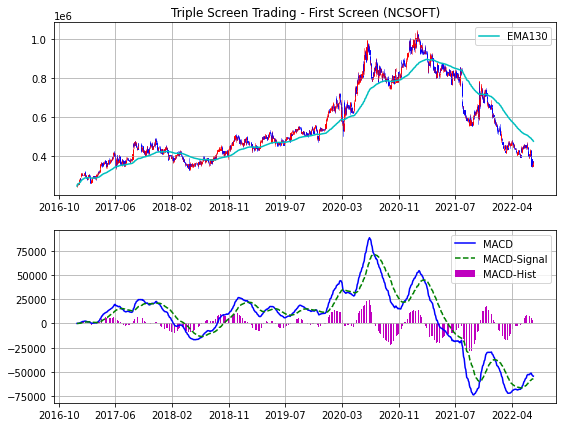

In [10]:
plt.figure(figsize=(9, 7))
p1 = plt.subplot(2, 1, 1)
plt.title('Triple Screen Trading - First Screen (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', 
    colordown='blue')  # ⑦ ohlc의 숫자형 일자, 시가, 고가, 저가, 종가 갓을 이용하여 캔들 차트를 그립니다.
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')

p2 = plt.subplot(2, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')
plt.show()

위의 그림은 삼중창 매매 시스템의 첫번째 창입니다. 시장의 장기 추세를 분석하기 위해서 26주 지수 이동평균에 해당하는 EMA 130 그래프와 주간 MACD 히스토그램을 함께 표시하고 있습니다.  

26주는 130 거래일에 해당하며, 1년 동안의 개장일의 절반에 해당합니다. 26주 지수 이동 평균 대신 일간 지수 이동 평균을 130일로 설정해서 사용해도 됩니다.

초기의 삼중창 시스템에서는 시장의 장기 추세를 파악하는데 MACD 히스토그램의 기울기를 이용했는데, 이는 MACD 히스토그램에서 최근 두 봉 높이를 비교해 파악할 수 있습니다. 알렉산더 엘더의 두 번째 서적인 [나의 트레이딩 룸으로 오라]에서 저자 자신도 처음에는 주간 추세추종 지표로 주간 MACD 히스토그램의 기울기를 사용했으나, 최근에는 26주 지수이동평균을 사용한다고 밝혔습니다.

실제로 강사가 테스트를 해봐도 주간 MACD 히스토그램을 사용했을 때는 불필요한 매수/매도 신호가 자주 발생해서, 강사도 지금은 26주 지수 이동평균(EMA 130)을 주간 추세추종 지표로 사용하고 있습니다. **결론적으로 말씀드리면, 삼중창 매매 시스템의 첫번째 창에는 EMA 130 그래프가 오르고 있을 때에만 시장에 참여하면 됩니다.**

##2-2. 두번째 창 - 시장 파도

###2-2-1. 스토캐스틱

오실레이터는 스토캐스틱이나 RSI처럼 과거 일정 기간의 가격 범위 안에서 현재 가격의 상대적인 위치를 나타내는 지표를 말합니다. 스토캐스틱은 조지 레인에 의해서 대중화된 오실레이터로서, 지난 n일 동안의 거래 범위에서 현재 가격의 위치를 백분율로 나타냅니다. 14일 스토캐스틱이 70이면 지난 14일간 거래에서 최저점과 최고점 사이 70%에 위치해 있다는 의미입니다. 일반적으로 80이상은 과매수 상태를 나타내고 20이하는 과매도 상태를 나타냅니다.  

스토캐스틱은 두 선으로 이루어져 있으며 빠른 선 %k, 느린 선은 %D입니다. 일반적으로 %K의 기간은 14일로 설정하지만 알렉산더 엘더는 짧은 반전을 잡아내기 용이한 5일로 설정합니다. (반면 기간이 길면 중요 변곡점을 잡아내는데 유용합니다.)

$$\%K = (오늘의\ 종가\ -\ 최근\ n일중\ 장중\ 최저가)/(\ 최근\ n일중\ 장중\ 최고가-최근\ n일중\ 장중\ 최저가)$$

$$\%D = \%K의\ 3일\ SMA$$

---

###2-2-2. 두번째 창 실습

삼중창 매매 시스템의 두번 째 창에서는 첫 번째 창의 추세 방향과 역행하는 파도를 파악하는 데 오실레이터를 활용합니다. 오실레이터는 시장이 하락할 때 매수 기회를 제공하고, 시장이 상승할 때 매도 기회를 제공합니다. 즉, 주봉 추세가 상승하고 있을 때 일봉 추세가 하락하면 매수 기회로 봅니다.

책 [주식시장에서 살아남는 심리투자 법칙]에서는 주간 히스토그램이 상승하고 있을 때, 스토캐스틱이 30 아래로 내려가면 매수하고, 주간 MACD 히스토그램이 하락하고 있을 때 스토캐스틱이 70 위로 올라가면 매도하라고 나와있습니다. 하지만 앞에서 설명했듯이 주간 히스토그램보다 130일 지수 이동평균의 신뢰성이 높기 때문에, 130일 지수 이동평균과 스토캐스틱을 함께 사용할 것입니다.  

다음은 삼중창 매매 시스템의 두 번째 창을 파이썬으로 구현한 코드입니다.

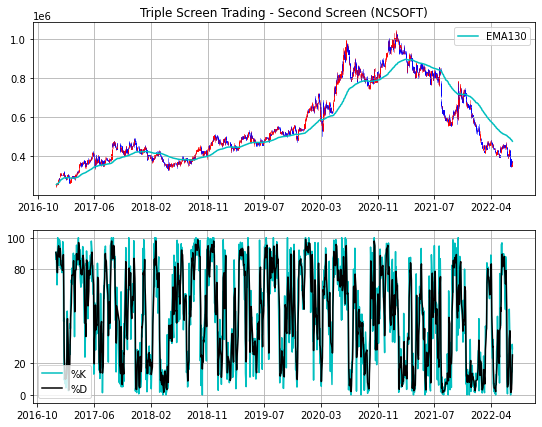

In [11]:
# ①
# 14일 동안의 최댓값을 구한다.
# min_periods=1은 14일 기간에 해당하는 데이터가 모두 누적되지 않아도
# 최소 기간인 1일 이상의 데이터만 존재하면 최댓값을 구하라는 의미다.
ndays_high = df.High.rolling(window=14, min_periods=1).max()

# ② ①과 동일하지만 최댓값이 아닌 최솟값을 구하는 것만 다르다.
ndays_low = df.Low.rolling(window=14, min_periods=1).min()

# ③ %K
fast_k = (df.Close - ndays_low) / (ndays_high - ndays_low) * 100

# ④ %D
slow_d= fast_k.rolling(window=3).mean()               

# ⑤ %K와 %D로부터 데이터프레임 생성 후 결측값 제거
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()             

plt.figure(figsize=(9, 7))
p1 = plt.subplot(2, 1, 1)
plt.title('Triple Screen Trading - Second Screen (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')
p1 = plt.subplot(2, 1, 2)
plt.grid(True)
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
# ⑥ Y축 눈금을 0, 20, 80, 100으로 설정하여 스토캐스틱의 기준선을 나타낸다.
plt.yticks([0, 20, 80, 100])
plt.legend(loc='best')
plt.show()

위 그림은 삼중창 매매 시스템의 두번째 창입니다. 위에는 130일 지수 이동평균 그래프를 표시하고, 아래에는 스토캐스틱 그래프를 표시하고 있습니다. 스토캐스틱에는 빠른 선인 %K와 느린 선인 %D가 있습니다. %K 대신 느린 %D를 사용할 경우 더 적은 신호를 만들어내기 때문에 그만큼 더 확실한 신호로 볼 수 있습니다.

삼중창 매매 시스템의 두 번째 창에서는 130일 지수 이동 평균이 상승하고 있을 때 스토캐스틱이 30 아래로 내려가면 매수 기회로 보고, 130일 지수 이동 평균이 하락하고 있을 때 스토캐스틱이 70 위로 올라가면 매도 기회로 보면 됩니다.

##2-3. 진입 기술

세번째 창은 차트나 지표를 필요로 하지 않습니다. 단지 첫번째 창과 두번째 창이 동시에 매매 신호를 냈을 때 진입 시점을 찾아내는 기법만 존재할 뿐입니다. 주간 추세가 상승하면 추적 매수 스톱 기법을 사용해 가격 변동에 따라 주문을 수정합니다. 하락 추세에서는 추적 매도 스톱 기법을 사용해 가격 변동에 따라 주문 수정을 수정합니다.

주간 추세가 상승하고 있을 때, 일간 오실레이터가 하락하면서 매수 신호가 발생하면 전일 고점보다 한 틱 위에서 매수 주문을 냅니다. 이를 추적 매수 스톱이라고 합니다. 만약 주간 추세대로 가격이 계속 상승해 전일 고점을 돌파하는 순간 매수 주문이 체결될 것입니다. 매수 주문이 체결되면, 전일의 저가나 그 전일의 저가 중 낮은 가격보다 한 틱 아래에 매도 주문을 걸어놓음으로써 손실을 막을 수 있습니다.

만일 가격이 하락한다면 매수 스톱은 체결되지 않을 것입니다. 매수 주문이 체결되지 않으면 다시 전일 고점 1틱 위까지 매수 주문의 수준을 낮추도록 합니다. 주간 추세가 반대 방향대로 움직이거나 매수 신호가 취소될 때까지 매일 매수 스톱을 낮추면서 주문을 걸어놓습니다.

다음은 주간 추세와 일간 오실레이터의 변동에 따라 주문을 내는 법을 정리한 내용입니다.

* 주간 추세가 상승, 일간 오실레이터가 상승, 행동은 관망  
* 주간 추세가 상승, 일간 오실레이터가 하락, 행동은 매수, 주문은 추적 매수 스톱  
* 주간 추세가 하락, 일간 오실레이터가 하락, 행동은 관망  
* 주간 추세가 하락, 일간 오실레이터가 상승, 행동은 매도, 주문은 추적 매도 스톱

강사는 두번째 창에 일간 오실레이터로 스토캐스틱의 %D를 사용했으며, 기준포인트도 70, 30 대신 80, 20을 사용해 더 확실한 신호를 잡아내도록 했습니다. 즉, 130일 이동 지수 평균이 상승하고 %D가 20 아래로 떨어질 때 매수하고, 130일 이동 지수 평균이 하락하고 %D가 80 위로 올라갈 때 매도하도록 구현했습니다.

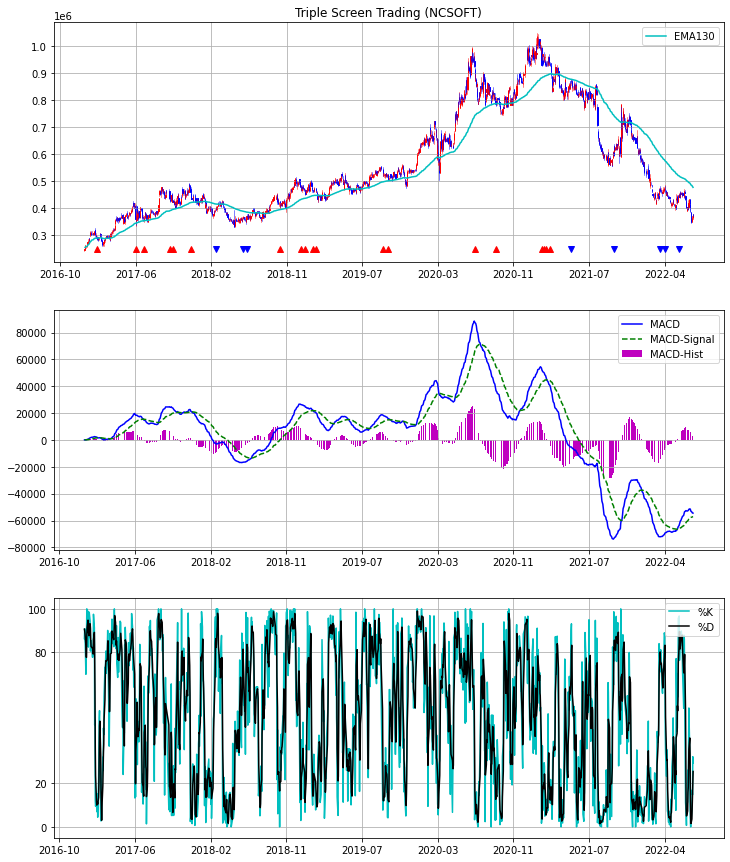

In [12]:
plt.figure(figsize=(12, 15))
p1 = plt.subplot(3, 1, 1)
plt.title('Triple Screen Trading (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
for i in range(1, len(df.Close)):
    # 130일 이동 지수 평균이 상승하고 %D가 20 아래로 떨어지면
    if df.ema130.values[i-1] < df.ema130.values[i] and \
        df.slow_d.values[i-1] >= 20 and df.slow_d.values[i] < 20:
        # 빨간색 삼각형으로 매수 신호 표시
        plt.plot(df.number.values[i], 250000, 'r^')

    # 130일 이동 지수 평균이 하락하고 %D가 80 위로 상승하면
    elif df.ema130.values[i-1] > df.ema130.values[i] and \
        df.slow_d.values[i-1] <= 80 and df.slow_d.values[i] > 80:
        # 파란색 삼각형으로 매도 신호 표시
        plt.plot(df.number.values[i], 250000, 'bv') 
plt.legend(loc='best')

p2 = plt.subplot(3, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')

p3 = plt.subplot(3, 1, 3)
plt.grid(True)
p3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0, 20, 80, 100])
plt.legend(loc='best')
plt.show()

첫번째 그래프에서 130일 이동 지수 평균이 상승하고 %D가 20 아래로 떨어질 때 매수 신호를 표시했습니다. (빨간색 삼각형)  

130일 이동 지수 평균이 하락하고 %D가 80 위로 올라갈 때 매도 신호를 표시했습니다. (파란색 삼각형)  


2017년부터 삼중창 시스템에 따라 엔씨소프트를 매매했다면, 2017년 2월에 290,000원 부근에 매수해 2018년 3월에 400,000원 부근에서 매도해 37%의 수익을 낸 뒤, 2018년 10월에 다시 400,000원에 매수해  2021년 6월 매도 신호가 발생했을 때 팔았다면 종가는 872,000원이므로 2018년 10월 대비로는 두 배 이상, 2017년 2월 대비로는 훨씬 큰 수익을 얻게됩니다.

# Quiz

## Quiz #1

종목 삼성전자 데이터의 2020년 1월 1일부터 현재까지의 데이터를 데이터프레임으로 로드한 후에 종가의 20일 지수 이동 평균을 구하고, 'EMA20'이라는 새로운 열에 추가하세요.

In [14]:
import FinanceDataReader as fdr
df = fdr.DataReader('005930','2020-01-01')
df['EMA20'] = df['Close'].ewm(span=20).mean()

In [15]:
df

,Open,High,Low,Close,Volume,Change,EMA20
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.000000
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55357.500000
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55409.825146
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55522.462594
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55831.488021
...,...,...,...,...,...,...,...
2022-07-04,56100,57400,55700,57100,17807126,0.016014,59890.452254
2022-07-05,57600,58200,57200,57200,14216539,0.001751,59634.218706
2022-07-06,57300,57300,56400,56400,16820461,-0.013986,59326.197877


## Quiz #1 풀이

In [ ]:
import FinanceDataReader as fdr

In [ ]:
df = fdr.DataReader('005930', '2020-01-01')
df['EMA20'] = df['Close'].ewm(span=20).mean() 

In [ ]:
df

,Open,High,Low,Close,Volume,Change,EMA20
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.000000
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55357.500000
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55409.825146
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55522.462594
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55831.488021
...,...,...,...,...,...,...,...
2021-07-02,80000,80400,79900,80000,8753097,-0.001248,80788.250568
2021-07-05,80100,80800,80000,80400,8330969,0.005000,80751.274324
2021-07-06,80600,81200,80500,81200,12131651,0.009950,80794.010102


## Quiz #2

O/X  퀴즈  

단순 이동 평균은 지수 이동 평균과는 달리 최근의 데이터에 대해서 더 가중을 준다는 단점으로 인해 단순 이동 평균보다는 더 세련된 도구인 지수 이동 평균이 선호된다. (O/X)

x

## Quiz #2 풀이

X 설명이 바뀌어있음.

## Quiz #3

O/X 퀴즈  
추세 지표'는 시장이 움직일 때는 잘 맞는데, 시장이 횡보할 때는 잘못된 신호를 보내기도 한다. (O/X)

o

## Quiz #3 풀이